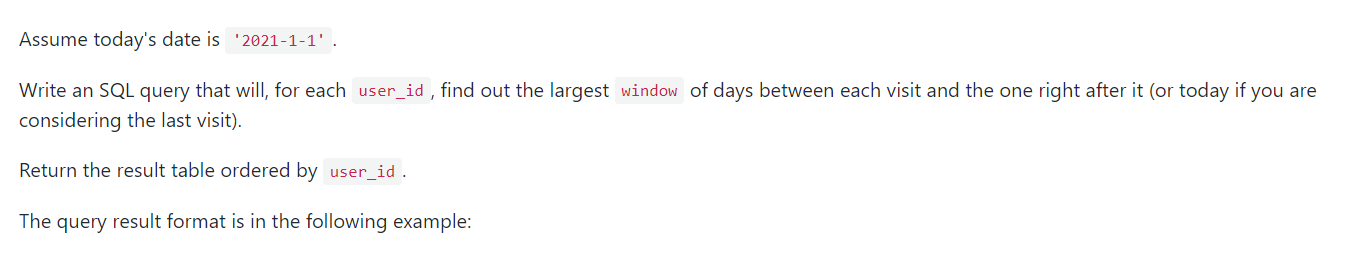

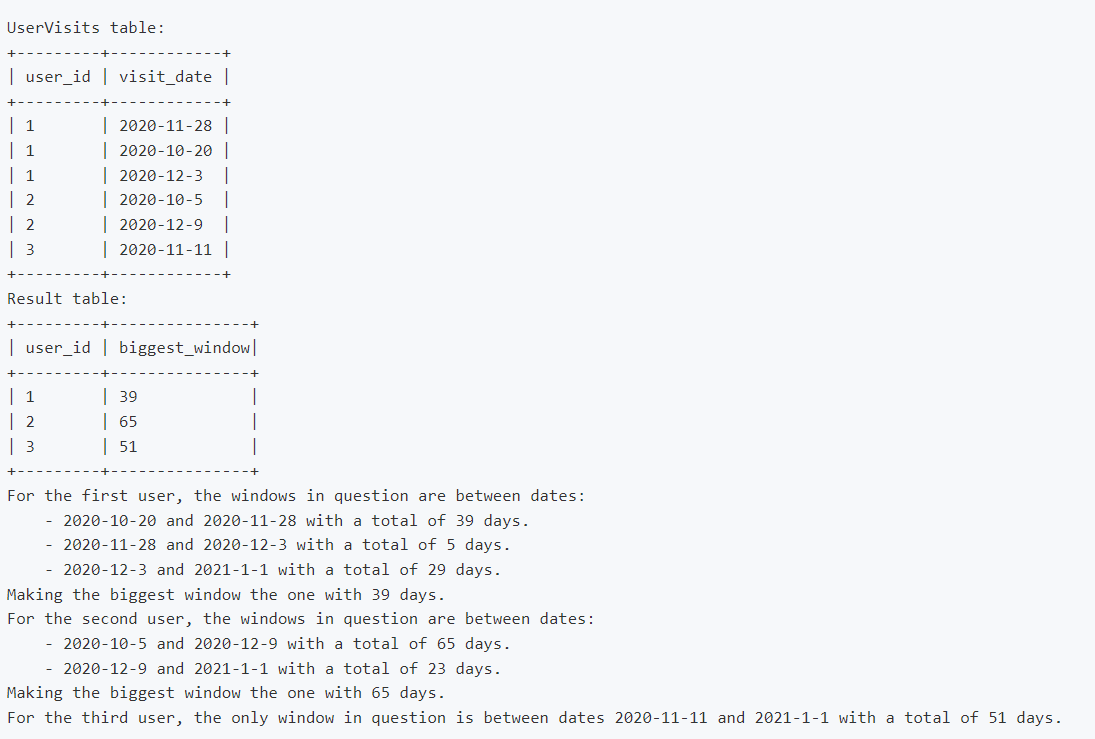

    with cte as
    (
        Select *, Lead(visit_date,1) Over(Partition by user_id Order By visit_date) as next_date
        from UserVisits
    ),
    cte2 as(
        Select user_id, CASE when next_date is not Null
        Then DateDiff(next_date,visit_date)
        Else DateDiff(CAST('2021-01-01' AS Date),visit_date)
        End as window 
        From cte
    )

    Select user_id, max(window) as biggest_window
    From cte2
    Group By user_id
    Order By user_id